<h1> <center> COMM 337 API Demo </center> <h1>

<h2 style="text-align: center; background: linear-gradient(90deg, #0074cc, #00aaff); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
  Web Scraping with APIs
</h2>

Extracting data from a specific website or even a webpage via manual or software tools. Use website APIs (Application Programming Interface). 

| Term                  | Explanation                                              |
|-----------------------|----------------------------------------------------------|
| **API (Application Programming Interface)** | Think of an API as a phone line that connects two apps or systems. It allows them to talk and share information, like making a phone call between two people. |
| **Endpoint**              | An endpoint is like a specific function you can ask the other person on the phone to perform. For example, you can ask them to "tell me the weather" or "send me a picture." Each endpoint does a particular task. |
| **Request**               | A request is like the words you use when you make a phone call. You tell the other person what you want, like "Please tell me the weather for tomorrow." In APIs, you send a request with specific instructions. |
| **Response**              | After you've made your request on the phone, the other person responds with information. In the API world, this is the response. It's what you get back as an answer to your request, like hearing the weather forecast. |

| Term                  | Explanation                                              |
|-----------------------|----------------------------------------------------------|
| **HTTP (Hypertext Transfer Protocol)** | HTTP is like the language both you and the other person on the phone use to understand each other. It's the protocol that helps you communicate clearly. |
| **JSON (JavaScript Object Notation)** | JSON is a way to write down your request and the response in a format that both you and the other person on the phone can easily read and understand. It's like using a common language. |
| **Authentication**        | Authentication is like telling the other person on the phone your name and confirming your identity before they share information with you. It ensures you have permission to access their data. |

In [47]:
import requests
import logging
import pandas as pd

# Configure logging
logging.basicConfig(level=logging.INFO)

def get_users():
    # Initialize an empty list to store logging results
    log_data = []

    # API endpoint URL for retrieving users
    api_url = 'https://jsonplaceholder.typicode.com/users'

    try:
        timestamp = pd.Timestamp.now()
        logging.info("Making a GET request to the API endpoint...")
        log_data.append({'Timestamp': timestamp, 'Message': "Making a GET request to the API endpoint..."})

        # Make a GET request to the API endpoint
        response = requests.get(api_url)

        timestamp = pd.Timestamp.now()
        logging.info(f"Received response with status code: {response.status_code}")
        log_data.append({'Timestamp': timestamp, 'Message': f"Received response with status code: {response.status_code}"})

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            timestamp = pd.Timestamp.now()
            logging.info("Parsing JSON response...")
            log_data.append({'Timestamp': timestamp, 'Message': "Parsing JSON response..."})

            # Parse the JSON response
            users = response.json()

            # Print the list of users
            for user in users:
                timestamp = pd.Timestamp.now()
                message = f"User ID: {user['id']}, Name: {user['name']}, Email: {user['email']}"
                logging.info(message)
                log_data.append({'Timestamp': timestamp, 'Message': message})

            timestamp = pd.Timestamp.now()
            logging.info("List of users printed successfully.")
            log_data.append({'Timestamp': timestamp, 'Message': "List of users printed successfully."})
        else:
            timestamp = pd.Timestamp.now()
            error_message = f"Error: Unable to fetch data. Status code: {response.status_code}"
            logging.error(error_message)
            log_data.append({'Timestamp': timestamp, 'Message': error_message})

    except Exception as e:
        timestamp = pd.Timestamp.now()
        error_message = f"Error: {e}"
        logging.error(error_message)
        log_data.append({'Timestamp': timestamp, 'Message': error_message})

    # Convert the list of dictionaries to a DataFrame
    log_df = pd.DataFrame(log_data)

    # Save the log DataFrame to a CSV file
    log_df.to_csv('api_request_log.csv', index=False)

# Call the function to retrieve and print the list of users
get_users()

INFO:root:Making a GET request to the API endpoint...
INFO:root:Received response with status code: 200
INFO:root:Parsing JSON response...
INFO:root:User ID: 1, Name: Leanne Graham, Email: Sincere@april.biz
INFO:root:User ID: 2, Name: Ervin Howell, Email: Shanna@melissa.tv
INFO:root:User ID: 3, Name: Clementine Bauch, Email: Nathan@yesenia.net
INFO:root:User ID: 4, Name: Patricia Lebsack, Email: Julianne.OConner@kory.org
INFO:root:User ID: 5, Name: Chelsey Dietrich, Email: Lucio_Hettinger@annie.ca
INFO:root:User ID: 6, Name: Mrs. Dennis Schulist, Email: Karley_Dach@jasper.info
INFO:root:User ID: 7, Name: Kurtis Weissnat, Email: Telly.Hoeger@billy.biz
INFO:root:User ID: 8, Name: Nicholas Runolfsdottir V, Email: Sherwood@rosamond.me
INFO:root:User ID: 9, Name: Glenna Reichert, Email: Chaim_McDermott@dana.io
INFO:root:User ID: 10, Name: Clementina DuBuque, Email: Rey.Padberg@karina.biz
INFO:root:List of users printed successfully.


In [48]:
log = pd.read_csv('api_request_log.csv')
log

,Timestamp,Message
0,2023-11-11 02:58:08.881256,Making a GET request to the API endpoint...
1,2023-11-11 02:58:09.005717,Received response with status code: 200
2,2023-11-11 02:58:09.006412,Parsing JSON response...
3,2023-11-11 02:58:09.007372,"User ID: 1, Name: Leanne Graham, Email: Sincer..."
4,2023-11-11 02:58:09.008140,"User ID: 2, Name: Ervin Howell, Email: Shanna@..."
5,2023-11-11 02:58:09.008818,"User ID: 3, Name: Clementine Bauch, Email: Nat..."
6,2023-11-11 02:58:09.009830,"User ID: 4, Name: Patricia Lebsack, Email: Jul..."
7,2023-11-11 02:58:09.010551,"User ID: 5, Name: Chelsey Dietrich, Email: Luc..."
8,2023-11-11 02:58:09.011220,"User ID: 6, Name: Mrs. Dennis Schulist, Email:..."
9,2023-11-11 02:58:09.011880,"User ID: 7, Name: Kurtis Weissnat, Email: Tell..."


In [49]:
import requests
from IPython.display import display, HTML

In [50]:
#%run wiki_scraper.py
from wiki_scraper import (get_wiki_search, 
                            print_wiki_search, 
                            scrape_wiki_data)

# File: wiki_scraper.py
```python
import wikipedia
import wptools
import pandas as pd

def get_wiki_search(company):
    return [{'company': wikipedia.search(company)}]

def print_wiki_search(wiki_search):
    for index, company in enumerate(wiki_search):
        for i, j in company.items():
            print('{}. {} :\n{}'.format(index + 1, i, ', '.join(j)))
            print('\n')

def scrape_wiki_data(companies, features):
    wiki_data = []

    for company in companies:
        page = wptools.page(company)  # create a page object
        try:
            page.get_parse()  # call the API and parse the data
            if page.data['infobox'] is not None:
                # if infobox is present
                infobox = page.data['infobox']
                # get data for the interested features/attributes
                data = {feature: infobox[feature] if feature in infobox else ''
                        for feature in features}
            else:
                data = {feature: '' for feature in features}

            data['company_name'] = company
            wiki_data.append(data)

        except KeyError:
            pass

    return pd.DataFrame(wiki_data).replace('{{|}}', '', regex=True).replace('nowrapl', '').T
```

In [51]:
## def get_wiki_search(company)

## def print_wiki_search(wiki_search)

## def scrape_wiki_data(companies, features)

In [52]:
company = 'Walmart'
companies = ['Walmart']
wiki_search = get_wiki_search(company)
print_wiki_search(wiki_search)

1. company :
Walmart, Walmarting, Walmart shooting, Criticism of Walmart, History of Walmart, 2019 El Paso shooting, List of Walmart brands, Walmart (disambiguation), Walmart Canada, Asda




In [53]:
features = ['founder', 'location_country', 'revenue', 'operating_income', 'net_income', 'assets',
            'equity', 'type', 'industry', 'products', 'num_employees']

In [54]:
wiki_data = scrape_wiki_data(companies, features)
wiki_data

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart Home Office.jpg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart H...
  infobox: <dict(32)> name, logo, logo_size, logo_caption, image, ...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(428694)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(360341)> {{Short description|American multination...
}


,0
founder,"[[Sam Walton]], [[Bud Walton]]"
location_country,U.S.
revenue,nowrap| |increase| |US$|611.3 billion|link|=|y...
operating_income,decrease US$|20.4 billion (FY2023)
net_income,decrease US$|11.29 billion (FY2023)
assets,nowrap| |decrease| |US$|243.45 billion| (FY202...
equity,decrease US$|83.754 billion (FY2023)
type,[[Public company|Public]]
industry,[[Retail]]
products,"Food, drinks, groceries, clothing, footwear, b..."


In [55]:
from categories import generate_wordcloud_from_df
from display_images_script import display_images

# File: generate_wordcloud_function.py
```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def generate_wordcloud_from_df(wiki_data):
    products_list = [product for products_entry in wiki_data.loc['products'].str.split(',').iloc[-1] for product in products_entry if isinstance(product, str)]
    
    text = ' '.join(products_list)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
```

# File: display_images_script.py
```python
import pandas as pd
import wikipedia
from IPython.display import display, HTML

def display_images(wiki_data, n):
    df = pd.DataFrame(wiki_data)
    df = df.replace('{{|}}', '', regex=True)
    df = df.replace('nowrapl', '')

    for index in wikipedia.WikipediaPage('Walmart').images[:n]:
        # Create an HTML image tag to display the image
        img_tag = f'<img src="{index}" alt="{"IMG"}">'

        # Use IPython.display to render the image in the Notebook
        display(HTML(img_tag))
```

In [56]:
display_images(wiki_data, 3)

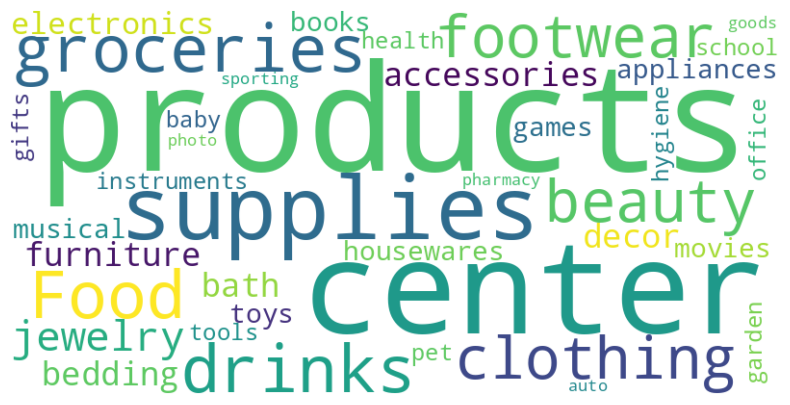

In [57]:
generate_wordcloud_from_df(wiki_data)